In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('Black Friday train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [6]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
col_with_nan=[col for col in df.columns if df[col].isna().sum()>1 ]

In [8]:
for col in col_with_nan:
    print(col," --> Having Missing Value of ",np.round((df[col].isnull().mean())*100,4),"%")

Product_Category_2  --> Having Missing Value of  31.5666 %
Product_Category_3  --> Having Missing Value of  69.6727 %


In [9]:
numerical_cols=[col for col in df.columns if df[col].dtype!='object']
categorical_cols=[col for col in df.columns if col not in numerical_cols]

In [10]:
for col in categorical_cols:
    
    print(f"{col}--> having unique categories of--> {len(df[col].unique())}")

Product_ID--> having unique categories of--> 3631
Gender--> having unique categories of--> 2
Age--> having unique categories of--> 7
City_Category--> having unique categories of--> 3
Stay_In_Current_City_Years--> having unique categories of--> 5


<AxesSubplot: xlabel='Purchase'>

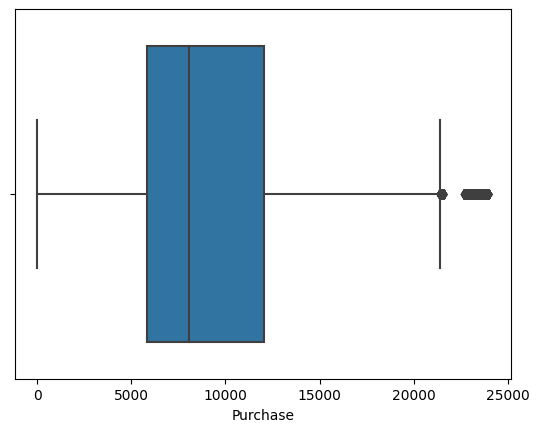

In [11]:
sns.boxplot(data=df,x=df['Purchase'])

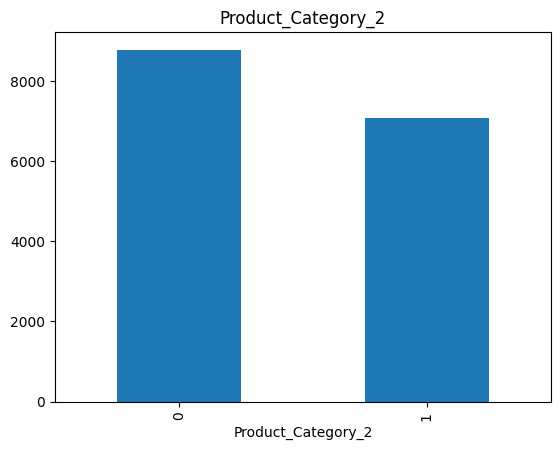

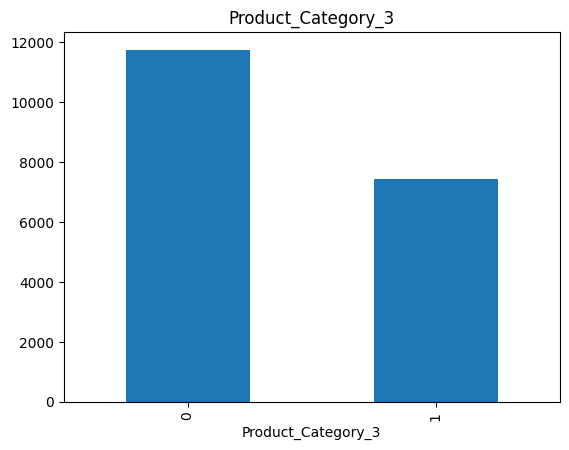

In [12]:
for col in col_with_nan:
    
    df_copy=df.copy()
    
    df_copy[col]=np.where(df[col].isna(),1,0)
    
    df_copy.groupby(col)['Purchase'].mean()
    df_copy.groupby(col)['Purchase'].median().plot.bar()
    
    plt.title(col)
    plt.show()

In [13]:
dicrete_num_col=[col for col in numerical_cols if len(df[col].unique())<=20]

In [14]:
dicrete_num_col

['Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

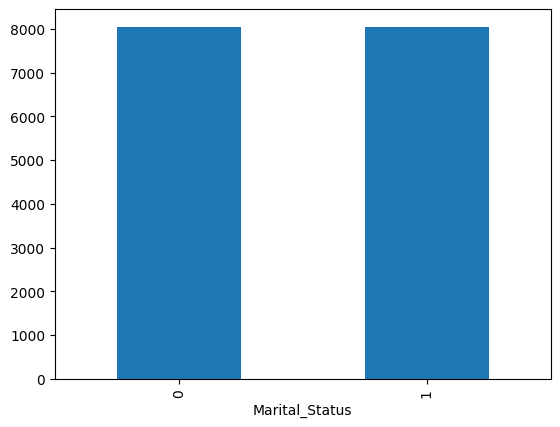

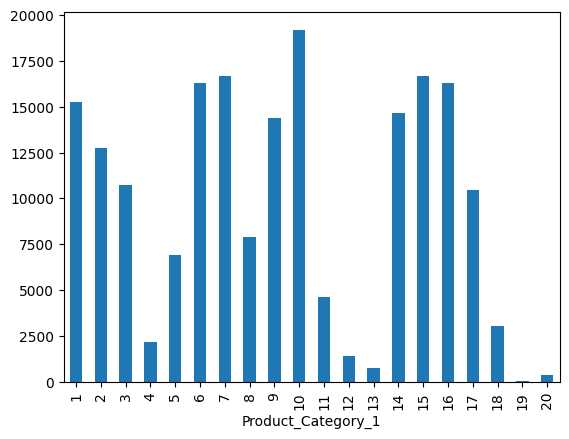

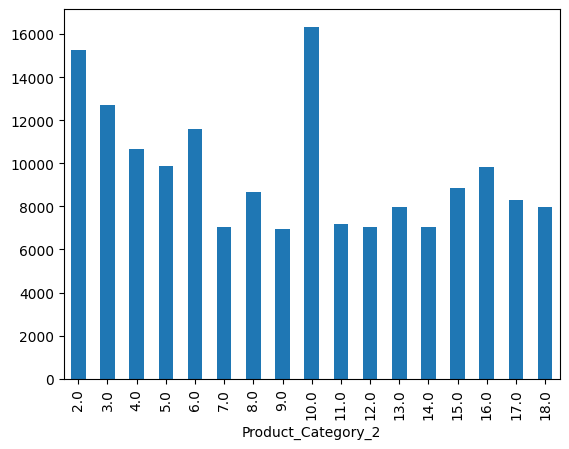

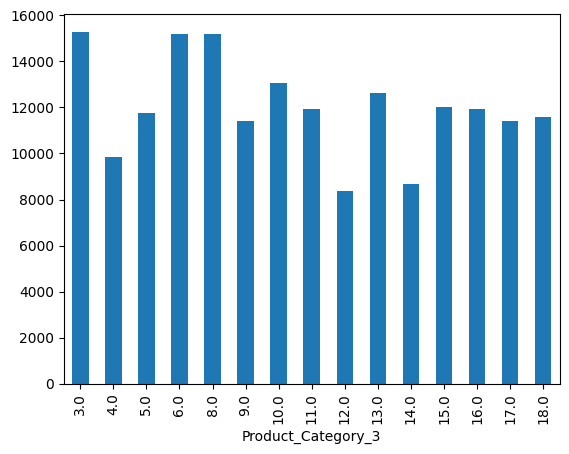

In [15]:
df_copy=df.copy()

for col in dicrete_num_col:
    
    df.groupby(col)['Purchase'].median().plot.bar()
    plt.show()

In [16]:
continues_features=[col for col in numerical_cols if col not in dicrete_num_col]

In [17]:
continues_features

['User_ID', 'Occupation', 'Purchase']

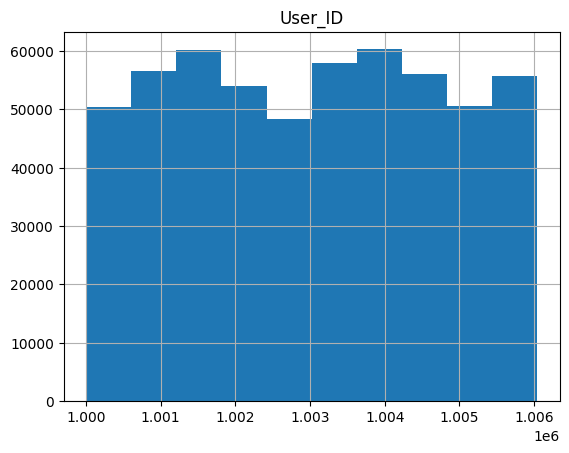

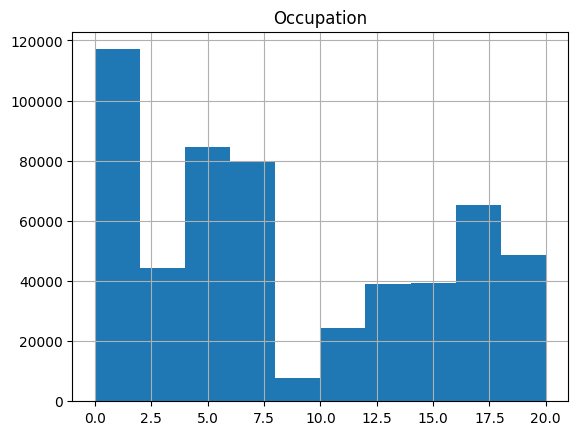

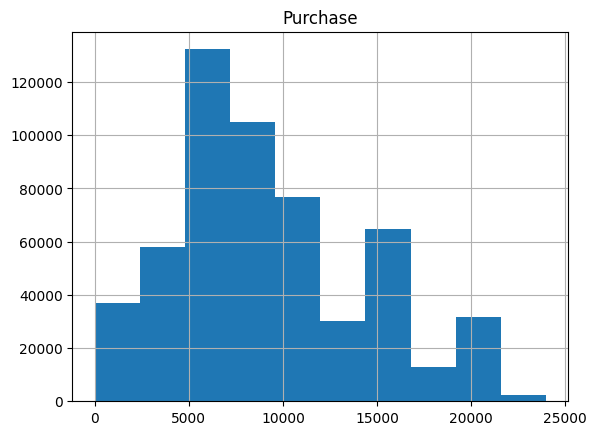

In [18]:
df_copy=df.copy()

for col in continues_features:
    df_copy[col].hist()
    plt.title(col)
    plt.show()

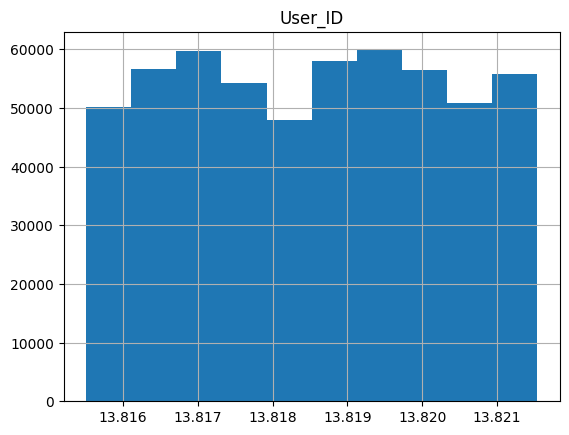

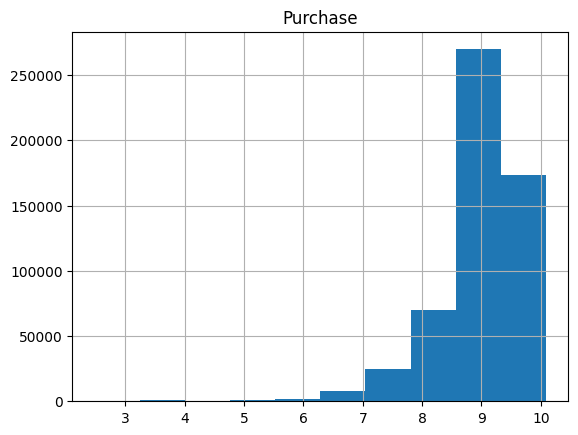

In [19]:
df_copy=df.copy()

for col in continues_features:
    if 0 in df_copy[col].unique():
        pass
    else:
        df_copy[col]=np.log(df_copy[col])
        
        df_copy[col].hist()
        plt.title(col)
        plt.show()

In [20]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0]).astype(int)

In [21]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0]).astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int64 
 10  Product_Category_3          550068 non-null  int64 
 11  Purchase                    550068 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 50.4+ MB


In [23]:
df.drop('User_ID',axis=1,inplace=True)

In [24]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [25]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [26]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace("+","").astype(int)

/tmp/ipykernel_12935/643537855.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace("+","").astype(int)


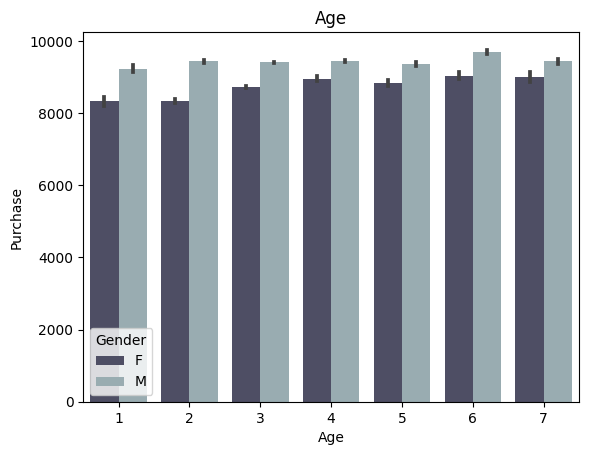

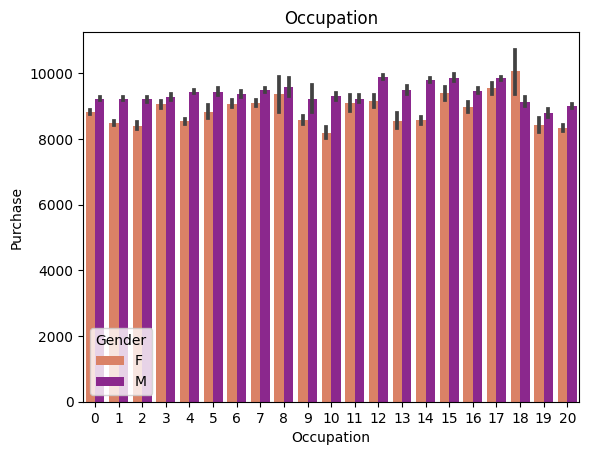

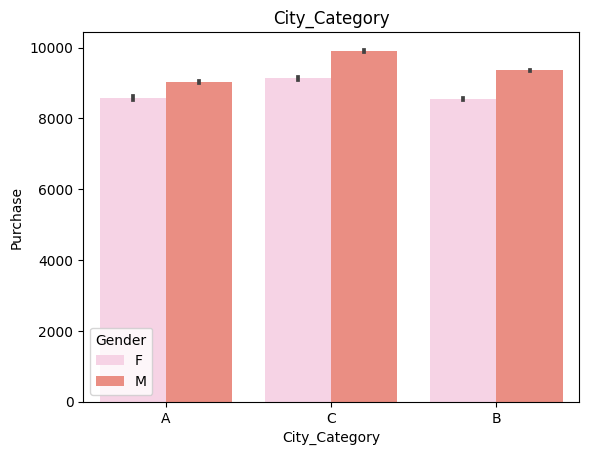

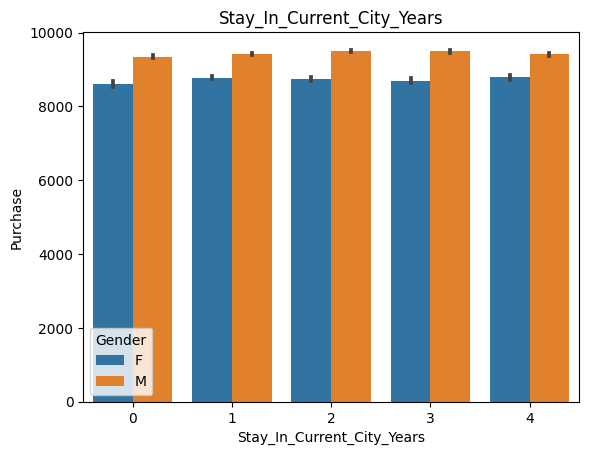

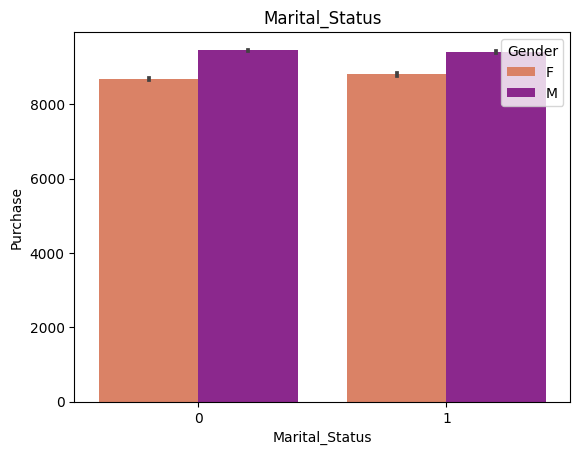

In [61]:
cmaps=plt.colormaps()

for col in ['Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    sns.barplot(data=df,x=col,y='Purchase',hue='Gender',palette=random.choice(cmaps))
    plt.title(col)
    plt.show()

In [59]:
import random
random.choice(cmaps)

'RdYlBu'

<AxesSubplot: xlabel='Gender', ylabel='Purchase'>

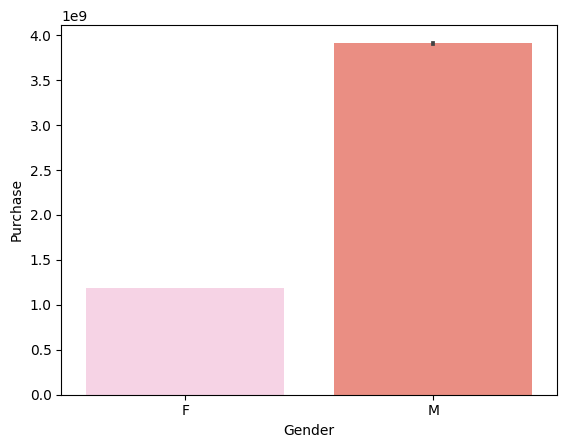

In [56]:
sns.barplot(df,x='Gender',y='Purchase',estimator='sum',palette='Set3_r')

<AxesSubplot: ylabel='Purchase'>

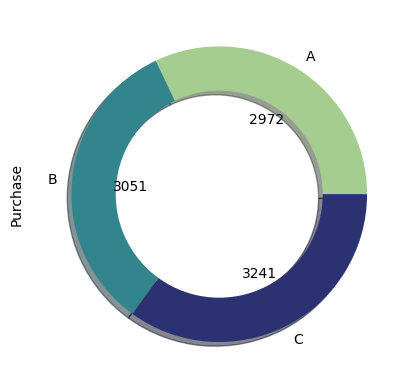

In [55]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie',cmap='crest',wedgeprops=dict(width=.30),shadow=True,autopct=lambda p : '{:.0f}'.format(p * (df['Purchase'].mean()) / 100))

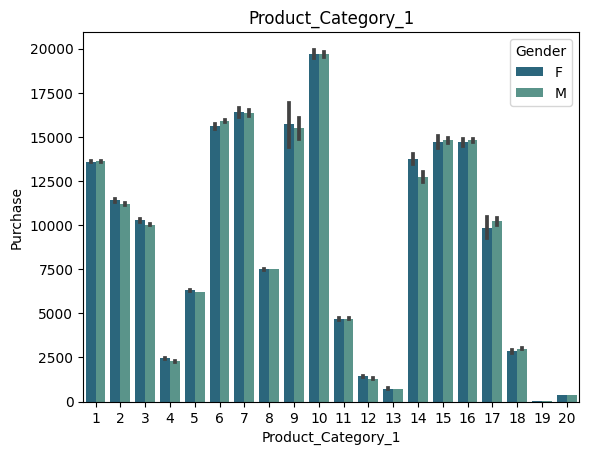

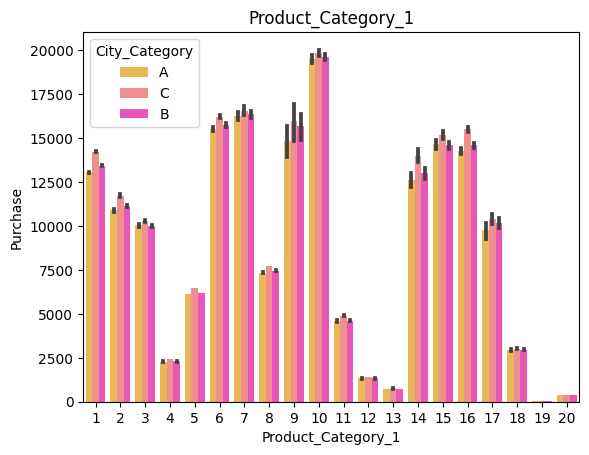

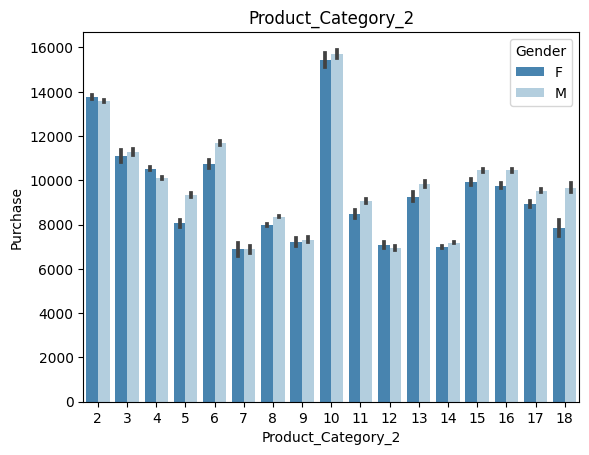

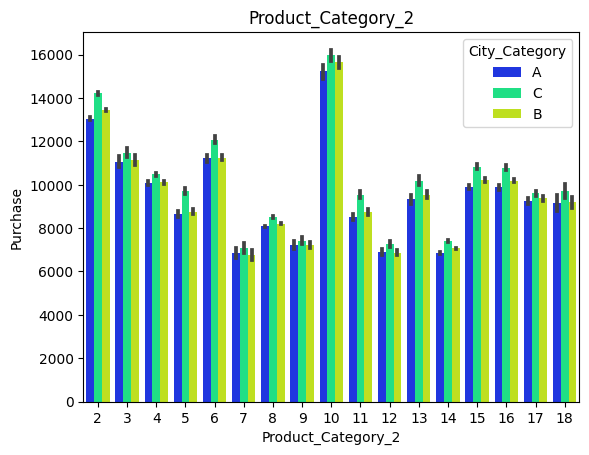

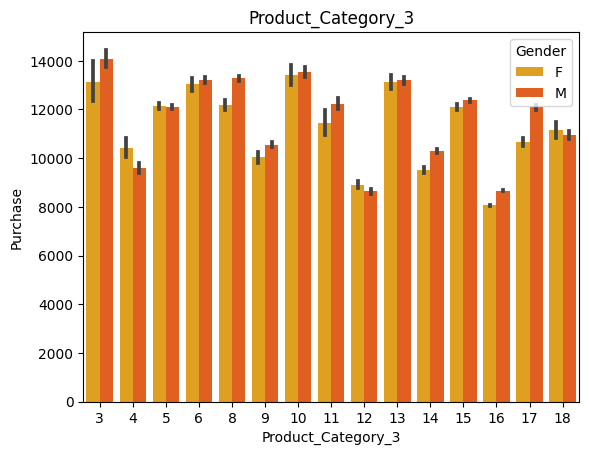

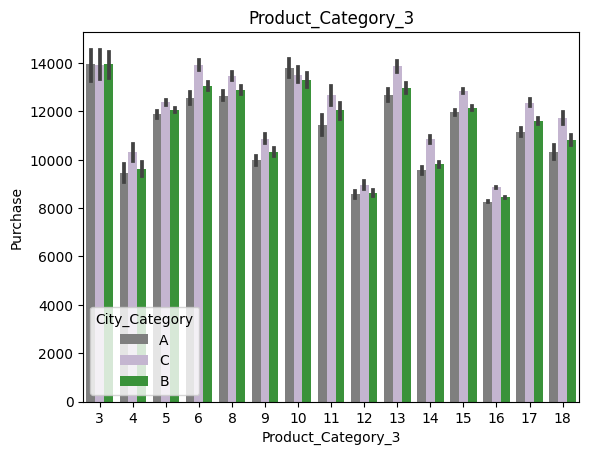

In [65]:
cmaps=plt.colormaps()

for col in ['Product_Category_1','Product_Category_2','Product_Category_3']:
    
    for i in ['Gender','City_Category']:
        sns.barplot(data=df,x=col,y='Purchase',hue=i,palette=random.choice(cmaps))
        plt.title(col)
        plt.show()

In [27]:
df=pd.get_dummies(df,columns=['Gender','City_Category'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Product_ID                  550068 non-null  object
 1   Age                         550068 non-null  int64 
 2   Occupation                  550068 non-null  int64 
 3   Stay_In_Current_City_Years  550068 non-null  int64 
 4   Marital_Status              550068 non-null  int64 
 5   Product_Category_1          550068 non-null  int64 
 6   Product_Category_2          550068 non-null  int64 
 7   Product_Category_3          550068 non-null  int64 
 8   Purchase                    550068 non-null  int64 
 9   Gender_F                    550068 non-null  uint8 
 10  Gender_M                    550068 non-null  uint8 
 11  City_Category_A             550068 non-null  uint8 
 12  City_Category_B             550068 non-null  uint8 
 13  City_Category_C             5